In [1]:
import os
from os import path
import shutil
import operator
import matplotlib.pyplot as plt
import random
import glob
import pretty_midi
import numpy as np
import joblib
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
import matplotlib.gridspec
import collections
# plotting.py contains utility functions for making nice histogram plots
import plotting_py as plotting

Root_Directory = r'D:\UNC\2021 Spring\Musical Similarity\Lakh\lmd_aligned_by_genre'
Destination = r'D:\UNC\2021 Spring\Musical Similarity\Lakh\lmd_aligned_by_genre'

{'Pop_Rock': 15346, 'Electronic': 2351, 'Country': 2036, 'RnB': 1760, 'Latin': 1254, 'Jazz': 1075, 'International': 958, 'Easy_Listening': 899, 'Vocal': 619, 'Rap': 604, 'Religious': 569, 'New': 476, 'Classical': 282, 'Children': 281, 'Folk': 196, 'Reggae': 131, 'Stage': 105, 'Blues': 98, 'Comedy_Spoken': 92, 'Holiday': 47, 'Avant_Garde': 24}


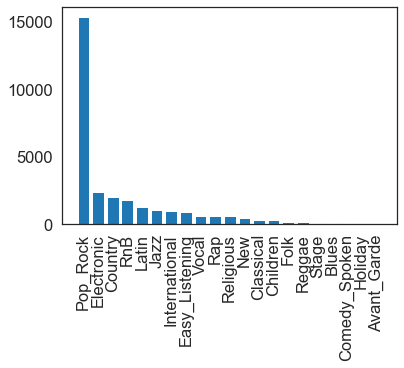

In [2]:
d = {}
for dir in os.listdir(Root_Directory):
    d[dir] = len(os.listdir(os.path.join(Root_Directory, dir)))
d = dict(sorted(d.items(), key = operator.itemgetter(1), reverse = True))
print(d)
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()), rotation = 90)
plt.show()

Randomly select 50 files from each genre, and put them together

In [14]:
Destination = r'D:\UNC\2021 Spring\Musical Similarity\Lakh\genre_100'
Root_Directory = r'D:\UNC\2021 Spring\Musical Similarity\Lakh\lmd_aligned_by_genre'
random.seed(1)
if not os.path.exists(Destination):
    os.makedirs(Destination)
for f in os.listdir(Destination):
    os.remove(os.path.join(Destination, f))
for dirs in os.listdir(Root_Directory):
    if d[str(dirs)] > 150:
        for i in range(0, 100):
            path = os.path.join(Root_Directory, dirs)
            while True:
                file = random.choice(os.listdir(path))
                if file not in os.listdir(Destination):
                    break 
            shutil.copy(os.path.join(path, file), Destination)
            
print(len(os.listdir(Destination)))

1500


In [29]:
Destination = r'D:\UNC\2021 Spring\Musical Similarity\Lakh\genre_500_pop20'
Root_Directory = r'D:\UNC\2021 Spring\Musical Similarity\Lakh\lmd_aligned_by_genre'
random.seed(123)
if not os.path.exists(Destination):
    os.makedirs(Destination)
for f in os.listdir(Destination):
    os.remove(os.path.join(Destination, f))
for dirs in os.listdir(Root_Directory):
    if dirs == "Pop_Rock":
        print("ITS POP ROCK")
        for i in range(0, 100):
            path = os.path.join(Root_Directory, dirs)
            while True:
                file = random.choice(os.listdir(path))
                if file not in os.listdir(Destination):
                    break 
            shutil.copy(os.path.join(path, file), Destination)
        print(len(os.listdir(Destination)))
    else:
        print(dirs)
        for i in range(0, 20):
            path = os.path.join(Root_Directory, dirs)
            while True:
                file = random.choice(os.listdir(path))
                if file not in os.listdir(Destination):
                    break 
            shutil.copy(os.path.join(path, file), Destination)
        print(len(os.listdir(Destination)))
    
            
print(len(os.listdir(Destination)))

Avant_Garde
20
Blues
40
Children
60
Classical
80
Comedy_Spoken
100
Country
120
Easy_Listening
140
Electronic
160
Folk
180
Holiday
200
International
220
Jazz
240
Latin
260
New
280
ITS POP ROCK
380
Rap
400
Reggae
420
Religious
440
RnB
460
Stage
480
Vocal
500
500


# Measuring Statistics about Information Sources in MIDI Files

In [15]:
def compute_statistics(midi_file):
    """
    Given a path to a MIDI file, compute a dictionary of statistics about it
    
    Parameters
    ----------
    midi_file : str
        Path to a MIDI file.
    
    Returns
    -------
    statistics : dict
        Dictionary reporting the values for different events in the file.
    """
    # Some MIDI files will raise Exceptions on loading, if they are invalid.
    # We just skip those.
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
        # Extract informative events from the MIDI file
        return {'n_instruments': len(pm.instruments),
                'program_numbers': [i.program for i in pm.instruments if not i.is_drum],
                'key_numbers': [k.key_number for k in pm.key_signature_changes],
                'tempos': list(pm.get_tempo_changes()[1]),
                'time_signature_changes': pm.time_signature_changes,
                'end_time': pm.get_end_time(),
                'lyrics': [l.text for l in pm.lyrics]}
    # Silently ignore exceptions for a clean presentation (sorry Python!)
    except Exception as e:
        pass


In [16]:
# Compute statistics about every file in our collection in parallel using joblib
# We do things in parallel because there are tons so it would otherwise take too long!
statistics = joblib.Parallel(n_jobs=10, verbose=0)(
    joblib.delayed(compute_statistics)(midi_file)
    for midi_file in glob.glob(os.path.join(Destination, '*.mid')))
# When an error occurred, None will be returned; filter those out.
statistics = [s for s in statistics if s is not None]

print("done")


done


# Length

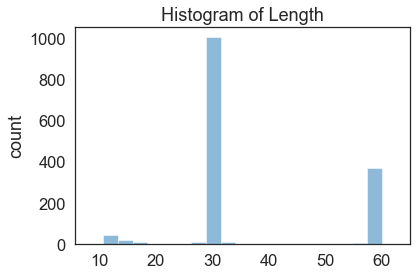

15.231886811596278


In [17]:
import numpy as np
import math
length = []
for s in statistics:
    length.append(s['end_time'])
bins = np.linspace(min(length), 
                   max(length),
                   20)
plt.xlim([min(length)-5, max(length)+5])
plt.hist(length, bins=bins, alpha = 0.5)
plt.title('Histogram of Length')
plt.ylabel('count')

plt.show()

print(sum(length)/3600)

# Number of Instruments

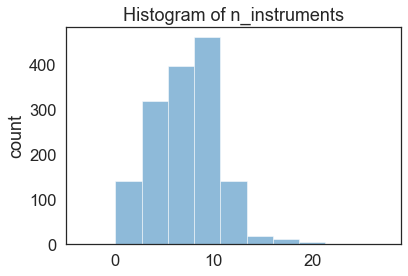

In [18]:
n_instruments = []
for s in statistics:
    n_instruments.append(s['n_instruments'])
bins = np.linspace(math.ceil(min(n_instruments)), 
                   math.floor(max(n_instruments)),
                   10)
plt.xlim([min(n_instruments)-5, max(n_instruments)+5])
plt.hist(n_instruments, bins=bins, alpha = 0.5)
plt.title('Histogram of n_instruments')
plt.ylabel('count')
plt.show()

# Program Numbers

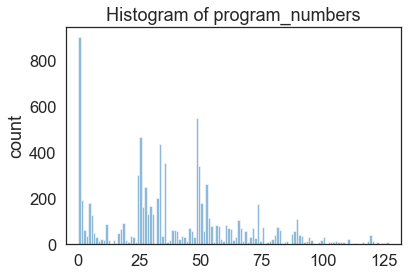

In [19]:
program_numbers = []
for s in statistics:
    for i in s['program_numbers']:
        program_numbers.append(i)
bins = np.linspace(math.ceil(min(program_numbers)), 
                   math.floor(max(program_numbers)),
                   128)
plt.xlim([min(program_numbers)-5, max(program_numbers)+5])
plt.hist(program_numbers, bins=bins, alpha = 0.5)
plt.title('Histogram of program_numbers')
plt.ylabel('count')
plt.show()

# Tempos

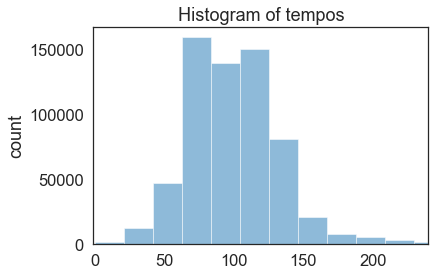

In [20]:
tempos = []
for s in statistics:
    for i in s['tempos']:
        tempos.append(i)
bins = np.linspace(0, 
                   480,
                   24)
plt.xlim([min(tempos)-5, 240])
plt.hist(tempos, bins=bins, alpha = 0.5)
plt.title('Histogram of tempos')
plt.ylabel('count')
plt.show()